In [2]:
!pip install gdown
import pandas as pd



In [3]:
# Download datasets from Google Drive links
!gdown --id 1ywxp6MHk535wD7u5UWE50Y3AjVbaVH8_ -O features.csv
!gdown --id 1zWyiVe1SntIsdrTSmS_iQzvLYBM7ycj6 -O train.csv
!gdown --id 11y7_ADY16hweDO-MOg73nZFmSciZmmpZ -O stores.csv


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ywxp6MHk535wD7u5UWE50Y3AjVbaVH8_
To: /content/features.csv
100% 592k/592k [00:00<00:00, 6.70MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zWyiVe1SntIsdrTSmS_iQzvLYBM7ycj6
To: /content/train.csv
100% 12.8M/12.8M [00:00<00:00, 44.0MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.g

In [4]:
# Read CSVs
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

print("Train shape:", train.shape)
print("Features shape:", features.shape)
print("Stores shape:", stores.shape)

train.head()


Train shape: (421570, 5)
Features shape: (8190, 12)
Stores shape: (45, 3)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
# Merge train with features
df = pd.merge(train, features, on=["Store", "Date", "IsHoliday"], how="left")

# Merge with stores
df = pd.merge(df, stores, on="Store", how="left")

print("Final merged shape:", df.shape)
df.head()


Final merged shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [18]:
# -------------------------------
# Data Cleaning & Inspection
# -------------------------------

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Fill missing MarkDowns with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Forward-fill CPI and Unemployment if needed
df["CPI"] = df["CPI"].ffill()
df["Unemployment"] = df["Unemployment"].ffill()

# Check datatypes
print("\nData types:\n", df.dtypes)

# Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Quick stats
print("\nDescriptive statistics:\n", df.describe(include='all').T)

# Preview data
df.head()


Missing values per column:
 Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Temperature           0
Fuel_Price            0
MarkDown1             0
MarkDown2             0
MarkDown3             0
MarkDown4             0
MarkDown5             0
CPI                   0
Unemployment          0
Size                  0
Year                  0
Month                 0
Week                  0
Day                   0
Lag_1              3331
Lag_2              6625
Rolling_Mean_4    13134
Type_B                0
Type_C                0
dtype: int64

Data types:
 Store                      int64
Dept                       int64
Date              datetime64[ns]
Weekly_Sales             float64
IsHoliday                   bool
Temperature              float64
Fuel_Price               float64
MarkDown1                float64
MarkDown2                float64
MarkDown3                float64
MarkDown4                float64
MarkDo

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Year,Month,Week,Day,Lag_1,Lag_2,Rolling_Mean_4,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,151315,2010,2,5,5,NaN,NaN,NaN,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,151315,2010,2,6,12,24924.50,NaN,NaN,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,151315,2010,2,7,19,46039.49,24924.50,NaN,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,151315,2010,2,8,26,41595.55,46039.49,NaN,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,151315,2010,3,9,5,19403.54,41595.55,32990.77,False,False


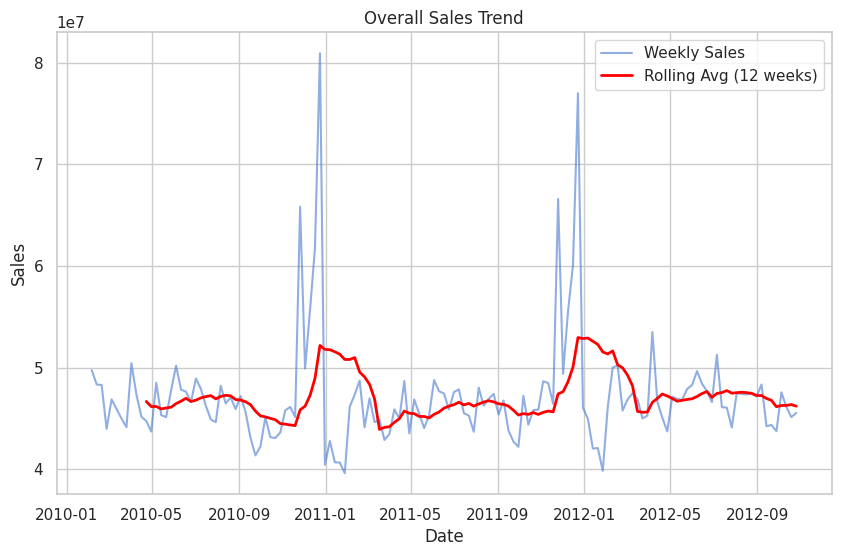

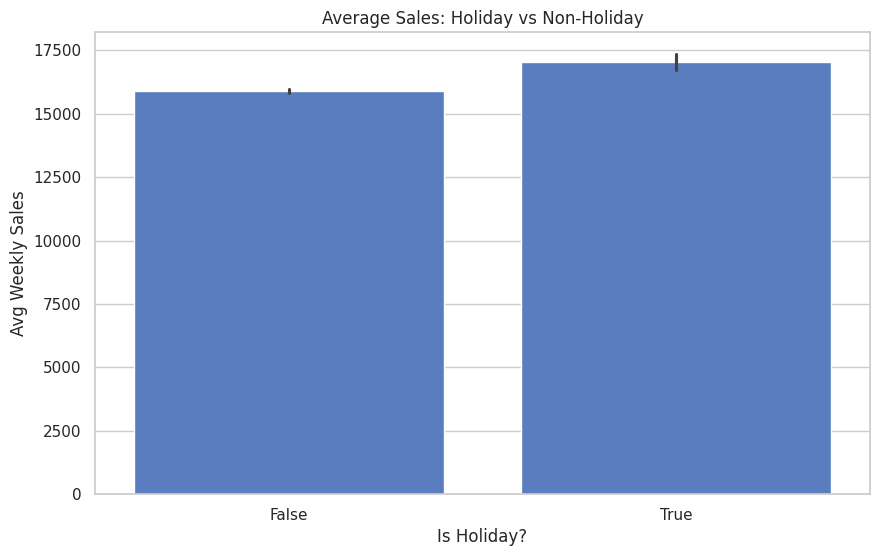

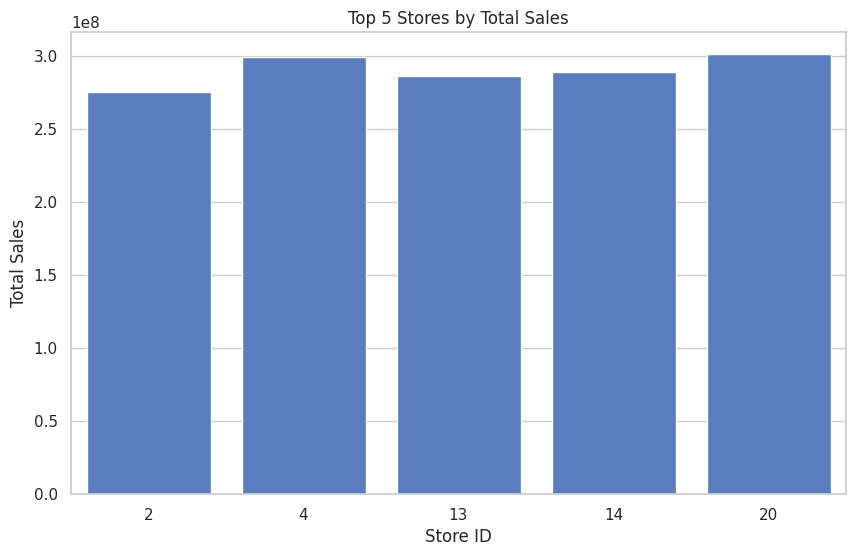

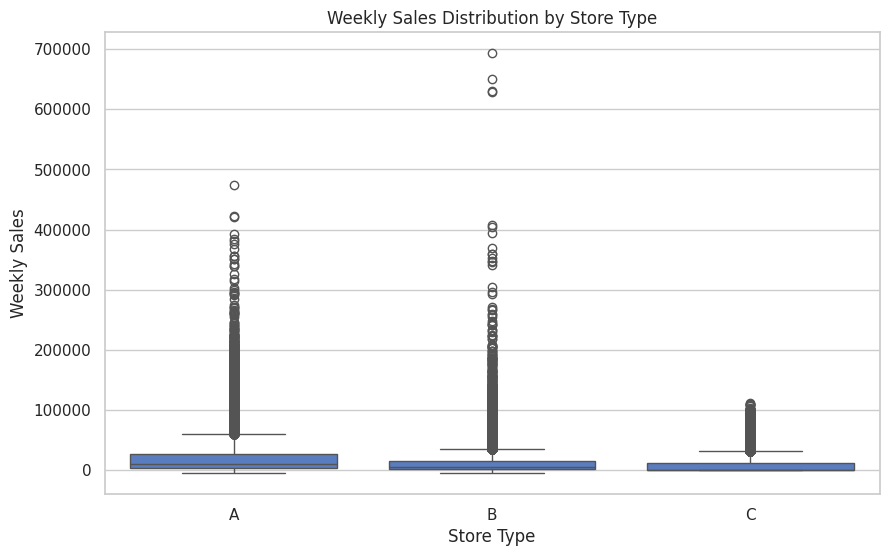

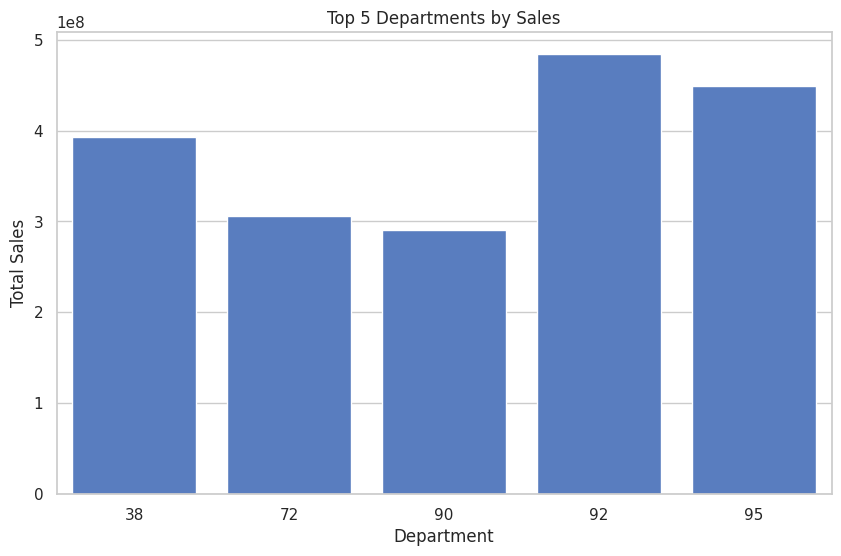

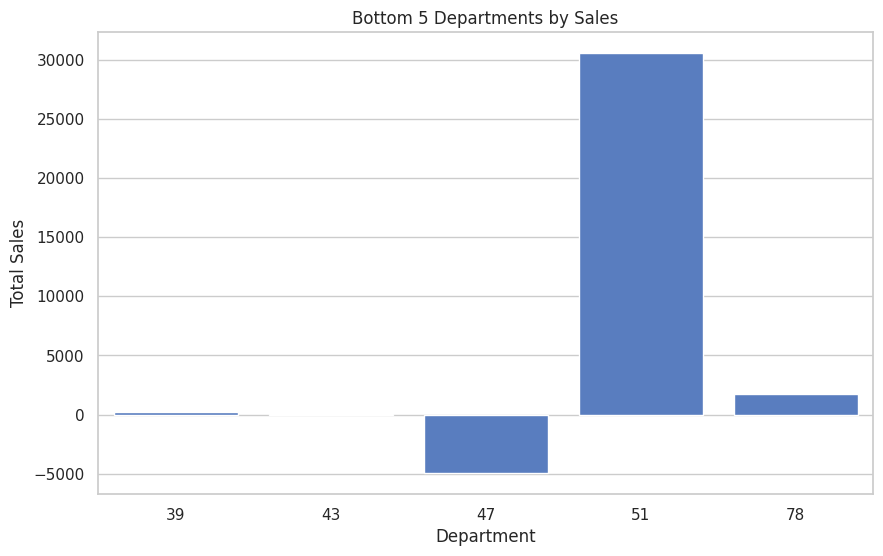

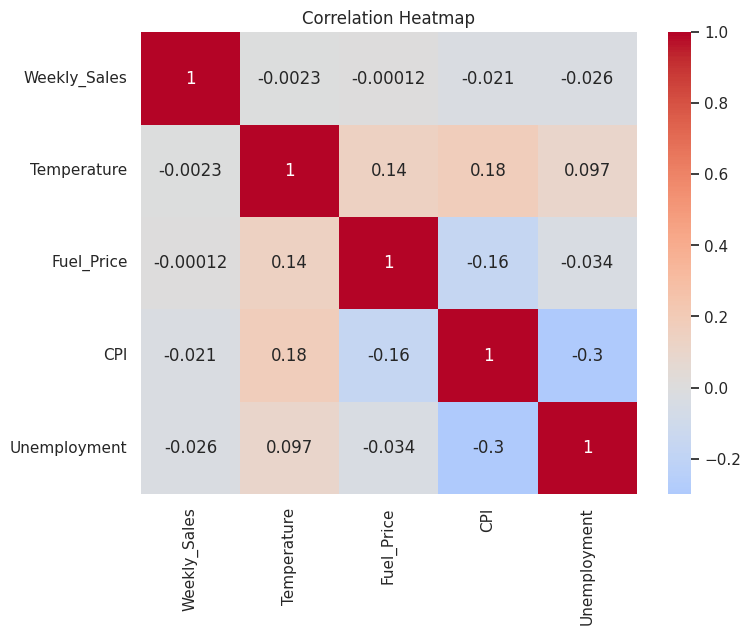

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10,6)

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# ----------------------------
# 1. Overall Sales Trend
# ----------------------------
df_grouped = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
df_grouped["Rolling"] = df_grouped["Weekly_Sales"].rolling(12).mean()

plt.figure()
plt.plot(df_grouped["Date"], df_grouped["Weekly_Sales"], label="Weekly Sales", alpha=0.6)
plt.plot(df_grouped["Date"], df_grouped["Rolling"], color="red", linewidth=2, label="Rolling Avg (12 weeks)")
plt.title("Overall Sales Trend")
plt.xlabel("Date"); plt.ylabel("Sales")
plt.legend(); plt.show()

# ----------------------------
# 2. Holiday Impact
# ----------------------------
plt.figure()
sns.barplot(data=df, x="IsHoliday", y="Weekly_Sales", estimator="mean")
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.xlabel("Is Holiday?"); plt.ylabel("Avg Weekly Sales")
plt.show()

# ----------------------------
# 3. Top 5 Stores
# ----------------------------
top_stores = df.groupby("Store")["Weekly_Sales"].sum().nlargest(5)
plt.figure()
sns.barplot(x=top_stores.index, y=top_stores.values)
plt.title("Top 5 Stores by Total Sales")
plt.xlabel("Store ID"); plt.ylabel("Total Sales")
plt.show()

# ----------------------------
# 4. Store Type Comparison
# ----------------------------
plt.figure()
sns.boxplot(data=df, x="Type", y="Weekly_Sales")
plt.title("Weekly Sales Distribution by Store Type")
plt.xlabel("Store Type"); plt.ylabel("Weekly Sales")
plt.show()

# ----------------------------
# 5. Department Insights
# ----------------------------
dept_sales = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=dept_sales.head(5).index, y=dept_sales.head(5).values)
plt.title("Top 5 Departments by Sales")
plt.xlabel("Department"); plt.ylabel("Total Sales")
plt.show()

plt.figure()
sns.barplot(x=dept_sales.tail(5).index, y=dept_sales.tail(5).values)
plt.title("Bottom 5 Departments by Sales")
plt.xlabel("Department"); plt.ylabel("Total Sales")
plt.show()

# ----------------------------
# 6. Correlation Heatmap
# ----------------------------
corr = df[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


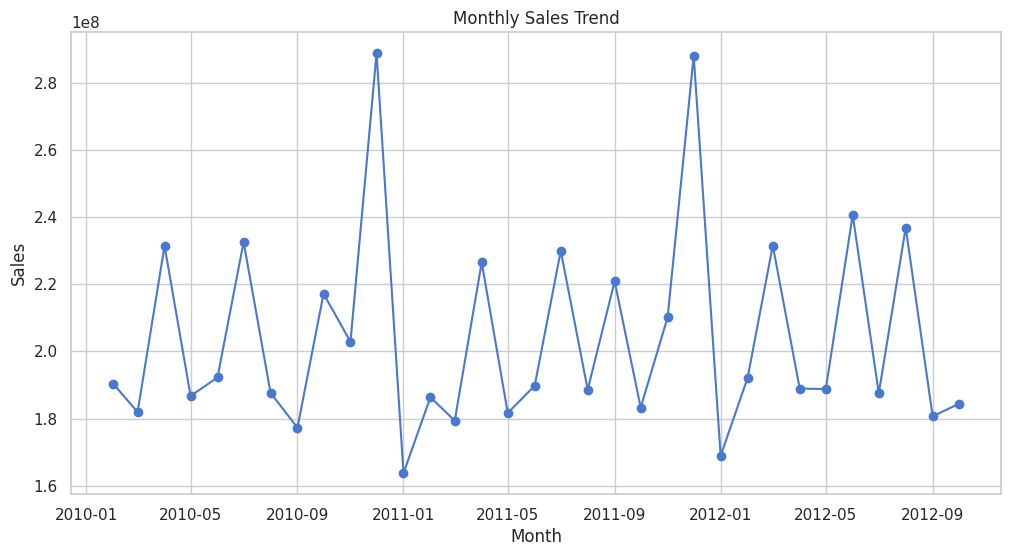

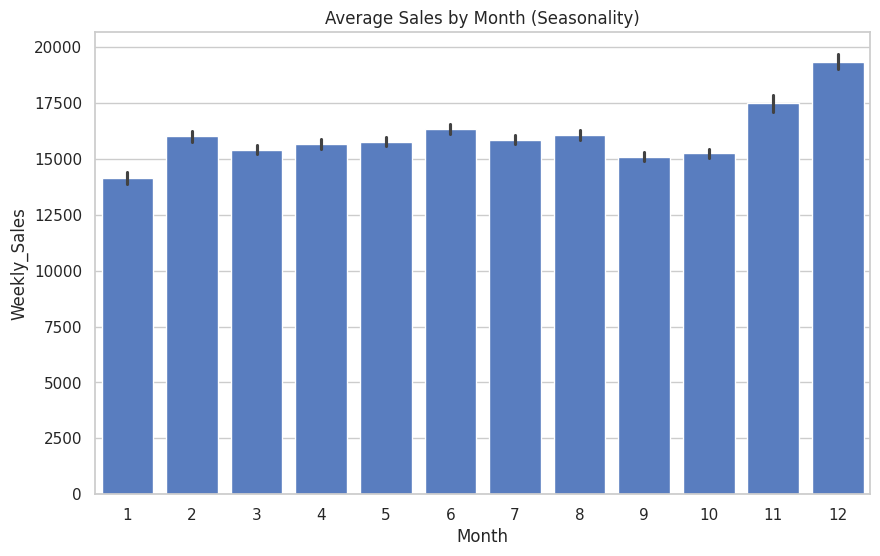

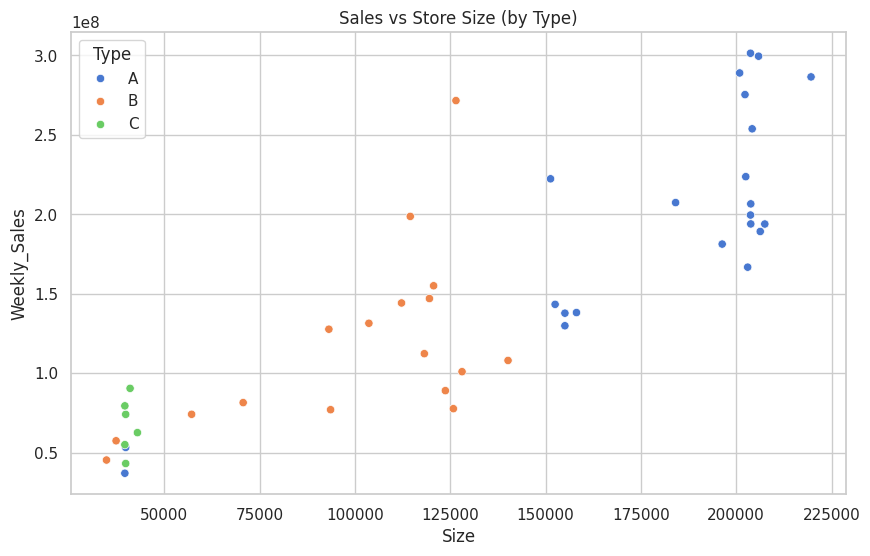

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


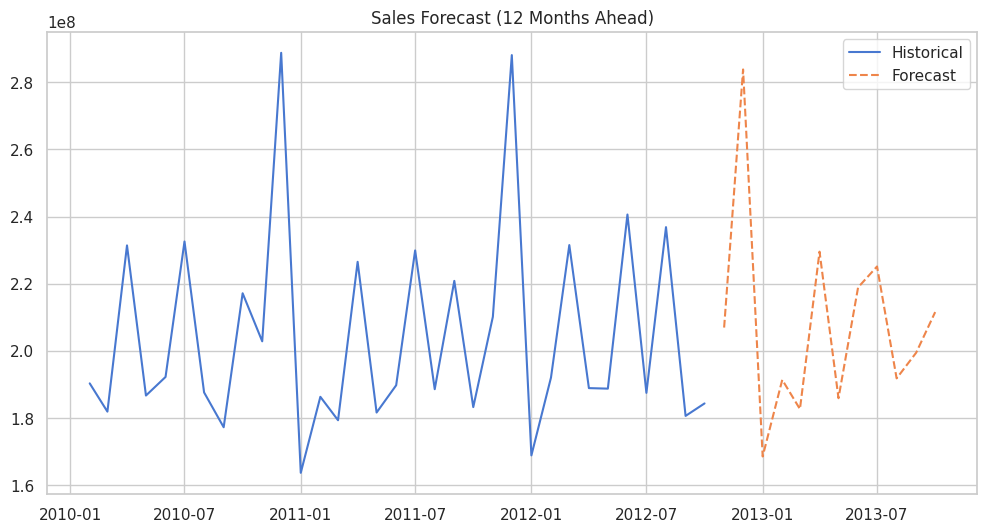

In [14]:
# Monthly aggregation
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))["Weekly_Sales"].sum().reset_index()
monthly_sales["Date"] = monthly_sales["Date"].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Date"], monthly_sales["Weekly_Sales"], marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month"); plt.ylabel("Sales")
plt.show()

# Seasonal plot by month
df["Month"] = df["Date"].dt.month
sns.barplot(x="Month", y="Weekly_Sales", data=df, estimator="mean")
plt.title("Average Sales by Month (Seasonality)")
plt.show()
 # Region-wise sales (assuming stores dataset has 'Size')
region_sales = df.groupby("Store")["Weekly_Sales"].sum().reset_index()
region_sales = pd.merge(region_sales, stores, on="Store", how="left")

sns.scatterplot(data=region_sales, x="Size", y="Weekly_Sales", hue="Type")
plt.title("Sales vs Store Size (by Type)")
plt.show()

from statsmodels.tsa.holtwinters import ExponentialSmoothing

ts = monthly_sales.set_index("Date")["Weekly_Sales"]
model = ExponentialSmoothing(ts, trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)

plt.figure(figsize=(12,6))
plt.plot(ts, label="Historical")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("Sales Forecast (12 Months Ahead)")
plt.legend()
plt.show()


In [23]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# -----------------------------
# 1️⃣ Peak and Lowest Months
# -----------------------------
monthly_avg = df.groupby(df['Date'].dt.month)['Weekly_Sales'].mean().sort_values(ascending=False)
peak_months = ', '.join(monthly_avg.head(2).index.astype(str))
lowest_months = ', '.join(monthly_avg.tail(2).index.astype(str))

# -----------------------------
# 2️⃣ Top and Bottom Stores
# -----------------------------
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top_stores = ', '.join(store_sales.head(2).index.astype(str))
bottom_stores = ', '.join(store_sales.tail(2).index.astype(str))

# -----------------------------
# 3️⃣ Store Type Impact
# -----------------------------
store_types = stores.set_index('Store')['Type']
type_avg_sales = df.groupby(df['Store'].map(store_types))['Weekly_Sales'].mean().sort_values(ascending=False)
best_type = type_avg_sales.index[0]
worst_type = type_avg_sales.index[-1]

# -----------------------------
# 4️⃣ Holiday Effect
# -----------------------------
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_effect = f"Holiday Avg: {holiday_sales.get(True,0):.2f}, Non-Holiday Avg: {holiday_sales.get(False,0):.2f}"

# -----------------------------
# 5️⃣ Forecast Trend (Next 12 Months)
# -----------------------------
ts = df.groupby(df['Date'].dt.to_period('M'))['Weekly_Sales'].sum()
ts.index = ts.index.to_timestamp()
model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)
forecast_trend = "Increasing" if forecast.mean() > ts.mean() else "Decreasing/Stable"

# -----------------------------
# 6️⃣ Create Insights Summary DataFrame
# -----------------------------
insights_summary = pd.DataFrame({
    "Observation": [
        "Peak Months for Sales",
        "Lowest Months for Sales",
        "Top Stores by Sales",
        "Bottom Stores by Sales",
        "Best Store Type",
        "Worst Store Type",
        "Holiday Effect on Sales",
        "Forecasted Trend (Next 12 Months)"
    ],
    "Details": [
        peak_months,
        lowest_months,
        top_stores,
        bottom_stores,
        best_type,
        worst_type,
        holiday_effect,
        forecast_trend
    ]
})
# -----------------------------
# 7️⃣ Style the Table
# -----------------------------
styled_table = insights_summary.style.set_properties(**{
    'text-align': 'left',
    'font-size': '12pt'
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2'), ('text-align', 'center')]
}]).map(lambda x: 'background-color: #d4f7d4; font-weight: bold;', subset=['Observation'])\
  .map(lambda x: 'background-color: #f7d4d4;', subset=['Details'])

# -----------------------------
# 8️⃣ Export Summary & Aggregated Files
# -----------------------------
insights_summary.to_csv("insights_summary.csv", index=False)
print("Insights summary exported as 'insights_summary.csv'")

# Export previously created processed/aggregated datasets if they exist
# Monthly sales summary
if 'monthly_sales' in globals():
    monthly_sales.to_csv("monthly_sales_summary.csv", index=False)
    print("Monthly sales summary exported as 'monthly_sales_summary.csv'")

# Region/store size summary
if 'region_sales' in globals():
    region_sales.to_csv("region_sales_summary.csv", index=False)
    print("Region/store sales summary exported as 'region_sales_summary.csv'")

styled_table


Insights summary exported as 'insights_summary.csv'
Monthly sales summary exported as 'monthly_sales_summary.csv'
Region/store sales summary exported as 'region_sales_summary.csv'


,Observation,Details
0,Peak Months for Sales,"12, 11"
1,Lowest Months for Sales,"9, 1"
2,Top Stores by Sales,"20, 4"
3,Bottom Stores by Sales,"44, 33"
4,Best Store Type,A
5,Worst Store Type,C
6,Holiday Effect on Sales,"Holiday Avg: 17035.82, Non-Holiday Avg: 15901.45"
7,Forecasted Trend (Next 12 Months),Increasing
